In [1]:
import pandas as pd

In [2]:
# Open the file and read it line by line
file_path = "annual1.txt"
data_list = []  # List to hold dictionaries

with open(file_path, "r") as file:
    # Read the first line, strip quotes from headers, and split by commas
    header = [col.strip('"') for col in file.readline().strip().split(",")]
    
    # Process each subsequent line
    for line in file:
        # Split the line by commas and strip quotes from each value
        values = [value.strip('"') for value in line.strip().split(",")]
        
        # Create a dictionary for the row
        row_dict = dict(zip(header, values))
        
        # Append the dictionary to the list
        data_list.append(row_dict)
    
df=pd.DataFrame(data_list)

columns=['Market and Exchange Names',
'As of Date in Form YYYY-MM-DD','Open Interest (All)',
'Noncommercial Positions-Long (All)',
'Noncommercial Positions-Short (All)',
'Commercial Positions-Long (All)',
'Commercial Positions-Short (All)',
' Total Reportable Positions-Long (All)',
'Total Reportable Positions-Short (All)',
'Nonreportable Positions-Long (All)',
'Nonreportable Positions-Short (All)',
'Change in Open Interest (All)',
'Change in Noncommercial-Long (All)',
'Change in Noncommercial-Short (All)',
'Change in Noncommercial-Spreading (All)',
'Change in Commercial-Long (All)',
'Change in Commercial-Short (All)',
'Change in Total Reportable-Long (All)',
'Change in Total Reportable-Short (All)',
'Change in Nonreportable-Long (All)',
'Change in Nonreportable-Short (All)']
df=df[columns]
df=df.reset_index(drop=True)

df['As of Date in Form YYYY-MM-DD'] = pd.to_datetime(df['As of Date in Form YYYY-MM-DD'], dayfirst=True, errors='coerce')
for i in df.columns[2:]:
    # print(i)
    df[i] = pd.to_numeric(df[i], errors='coerce').astype('Int64') 

col_dict={
    'Noncommercial':['Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)'],
    'Commercial':['Commercial Positions-Long (All)','Commercial Positions-Short (All)'],
    'Total Reportable':[' Total Reportable Positions-Long (All)','Total Reportable Positions-Short (All)'],
    'Nonreportable':['Nonreportable Positions-Long (All)','Nonreportable Positions-Short (All)']}

for a, b in col_dict.items():
    df[f'{a}_net_positions'] = df[b[0]] - df[b[1]]



# print(data_list)


C:\Users\user\AppData\Local\Temp\ipykernel_7528\764922646.py:45: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['As of Date in Form YYYY-MM-DD'] = pd.to_datetime(df['As of Date in Form YYYY-MM-DD'], dayfirst=True, errors='coerce')


In [3]:
df

,Market and Exchange Names,As of Date in Form YYYY-MM-DD,Open Interest (All),Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),Commercial Positions-Long (All),Commercial Positions-Short (All),Total Reportable Positions-Long (All),Total Reportable Positions-Short (All),Nonreportable Positions-Long (All),...,Change in Commercial-Long (All),Change in Commercial-Short (All),Change in Total Reportable-Long (All),Change in Total Reportable-Short (All),Change in Nonreportable-Long (All),Change in Nonreportable-Short (All),Noncommercial_net_positions,Commercial_net_positions,Total Reportable_net_positions,Nonreportable_net_positions
0,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-11-19,448073,116397,162436,173884,120161,417251,409567,30822,...,-2451,-9065,2099,2995,-973,-1869,-46039,53723,7684,-7684
1,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-11-12,446947,105967,144496,176335,129226,415152,406572,31795,...,7459,-9536,3433,2426,226,1233,-38529,47109,8580,-8580
2,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-11-05,443288,104711,127252,168876,138762,411719,404146,31569,...,7280,8766,25951,27087,1449,313,-22541,30114,7573,-7573
3,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-10-29,415888,106934,129825,161596,129996,385768,377059,30120,...,6678,-2459,5382,2054,-297,3031,-22891,31600,8709,-8709
4,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-10-22,410803,111145,128227,154918,132455,380386,375005,30417,...,8709,4679,11917,11255,342,1004,-17082,22463,5381,-5381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-30,17180,50,6024,16455,10451,17180,17150,0,...,-790,165,-490,-485,-10,-15,-5974,6004,30,-30
14774,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-23,17680,50,6974,17245,10286,17670,17635,10,...,1965,1041,1915,1940,10,-15,-6924,6959,35,-35
14775,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-16,15755,50,6025,15280,9245,15755,15695,0,...,1555,1105,1650,1710,-60,-120,-5975,6035,60,-60
14776,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-09,14165,50,5515,13725,8140,14105,13985,60,...,-1708,-803,-1983,-2043,0,60,-5465,5585,120,-120


In [4]:
df['Market and Exchange Names'].unique()

array(['WHEAT-SRW - CHICAGO BOARD OF TRADE',
       'WHEAT-HRW - CHICAGO BOARD OF TRADE',
       'WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE',
       'CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE',
       'SOYBEANS - CHICAGO BOARD OF TRADE',
       'MINI SOYBEANS - CHICAGO BOARD OF TRADE',
       'NJ SRECS - ICE FUTURES ENERGY DIV',
       'PJM TRI-RECs CLASS 1 - ICE FUTURES ENERGY DIV',
       'CALIF LOW CARBON FSC-OPIS - ICE FUTURES ENERGY DIV',
       'D6 RINs OPIS CURRENT YEAR - ICE FUTURES ENERGY DIV',
       'PA SOLAR ALTER ENERGY CREDIT - ICE FUTURES ENERGY DIV',
       'CALIF CARBON CURRENT AUCTION - ICE FUTURES ENERGY DIV',
       'D4 BIODIESEL RINs OPIS CURR YR - ICE FUTURES ENERGY DIV',
       'CT RECs CLASS 1 - ICE FUTURES ENERGY DIV',
       'MASS COMPLIANCE RECs CLASS 1 - ICE FUTURES ENERGY DIV',
       'MARYLAND COMPLIANCE REC TIER1 - ICE FUTURES ENERGY DIV',
       'MARYLAND SOLAR REC - ICE FUTURES ENERGY DIV',
       'NEPOOL DUAL RECs CLASS 1 - ICE F

In [5]:
df.dtypes

Market and Exchange Names                          object
As of Date in Form YYYY-MM-DD              datetime64[ns]
Open Interest (All)                                 Int64
Noncommercial Positions-Long (All)                  Int64
Noncommercial Positions-Short (All)                 Int64
Commercial Positions-Long (All)                     Int64
Commercial Positions-Short (All)                    Int64
 Total Reportable Positions-Long (All)              Int64
Total Reportable Positions-Short (All)              Int64
Nonreportable Positions-Long (All)                  Int64
Nonreportable Positions-Short (All)                 Int64
Change in Open Interest (All)                       Int64
Change in Noncommercial-Long (All)                  Int64
Change in Noncommercial-Short (All)                 Int64
Change in Noncommercial-Spreading (All)             Int64
Change in Commercial-Long (All)                     Int64
Change in Commercial-Short (All)                    Int64
Change in Tota

In [6]:
df['As of Date in Form YYYY-MM-DD'] = pd.to_datetime(df['As of Date in Form YYYY-MM-DD'], dayfirst=True, errors='coerce')
for i in df.columns[2:]:
    # print(i)
    df[i] = pd.to_numeric(df[i], errors='coerce').astype('Int64') 

col_dict={
    'Noncommercial':['Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)'],
    'Commercial':['Commercial Positions-Long (All)','Commercial Positions-Short (All)'],
    'Total Reportable':[' Total Reportable Positions-Long (All)','Total Reportable Positions-Short (All)'],
    'Nonreportable':['Nonreportable Positions-Long (All)','Nonreportable Positions-Short (All)']}

for a, b in col_dict.items():
    df[f'{a}_net_positions'] = df[b[0]] - df[b[1]]



In [7]:
df[df.columns[0]].value_counts()

Market and Exchange Names
WHEAT-SRW - CHICAGO BOARD OF TRADE                              47
PJM.PECO_month_on_dap - NODAL EXCHANGE                          47
PJM.PSEG_month_off_dap - NODAL EXCHANGE                         47
PJM.PSEG_month_on_dap - NODAL EXCHANGE                          47
PJM.PPL_month_off_dap - NODAL EXCHANGE                          47
                                                                ..
PJM TRI-RECs CLASS 1 PRIOR YR - ICE FUTURES ENERGY DIV           2
PJM BGE ZONE DA OFFPEAK FIXED - ICE FUTURES ENERGY DIV           1
PJM BGE ZONE DA                                                  1
TRANSCO ZONE 6 (NY) (BASIS) - ICE FUTURES ENERGY DIV             1
E-MINI S&P COMMUNICATION INDEX - CHICAGO MERCANTILE EXCHANGE     1
Name: count, Length: 382, dtype: int64

In [8]:
=df[df.columns[0]].unique().tolist()

SyntaxError: invalid syntax (2504984953.py, line 1)

In [9]:
col_dict={
    'Noncommercial':['Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)','Change in Noncommercial-Long (All)','Change in Noncommercial-Short (All)'],
    'Commercial':['Commercial Positions-Long (All)','Commercial Positions-Short (All)','Change in Commercial-Long (All)','Change in Commercial-Short (All)'],
    'Total Reportable':[' Total Reportable Positions-Long (All)','Total Reportable Positions-Short (All)','Change in Total Reportable-Long (All)','Change in Total Reportable-Short (All)'],
    'Nonreportable':['Nonreportable Positions-Long (All)','Nonreportable Positions-Short (All)','Change in Nonreportable-Long (All)','Change in Nonreportable-Short (All)']}

In [10]:
col_dict={
    'Noncommercial':['Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)'],
    'Commercial':['Commercial Positions-Long (All)','Commercial Positions-Short (All)'],
    'Total Reportable':[' Total Reportable Positions-Long (All)','Total Reportable Positions-Short (All)'],
    'Nonreportable':['Nonreportable Positions-Long (All)','Nonreportable Positions-Short (All)']}

for a, b in col_dict.items():
    df[f'{a}_net_positions'] = df[b[0]] - df[b[1]]

In [11]:
df['Market and Exchange Names'].unique()

array(['WHEAT-SRW - CHICAGO BOARD OF TRADE',
       'WHEAT-HRW - CHICAGO BOARD OF TRADE',
       'WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE',
       'CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE',
       'SOYBEANS - CHICAGO BOARD OF TRADE',
       'MINI SOYBEANS - CHICAGO BOARD OF TRADE',
       'NJ SRECS - ICE FUTURES ENERGY DIV',
       'PJM TRI-RECs CLASS 1 - ICE FUTURES ENERGY DIV',
       'CALIF LOW CARBON FSC-OPIS - ICE FUTURES ENERGY DIV',
       'D6 RINs OPIS CURRENT YEAR - ICE FUTURES ENERGY DIV',
       'PA SOLAR ALTER ENERGY CREDIT - ICE FUTURES ENERGY DIV',
       'CALIF CARBON CURRENT AUCTION - ICE FUTURES ENERGY DIV',
       'D4 BIODIESEL RINs OPIS CURR YR - ICE FUTURES ENERGY DIV',
       'CT RECs CLASS 1 - ICE FUTURES ENERGY DIV',
       'MASS COMPLIANCE RECs CLASS 1 - ICE FUTURES ENERGY DIV',
       'MARYLAND COMPLIANCE REC TIER1 - ICE FUTURES ENERGY DIV',
       'MARYLAND SOLAR REC - ICE FUTURES ENERGY DIV',
       'NEPOOL DUAL RECs CLASS 1 - ICE F

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_market_changes(df, value_column):
    """
    Plots a line chart showing changes over time for the specified column, grouped by 'Market and Exchange Names'.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame containing the data.
        value_column (str): The column to analyze (e.g., 'Open Interest (All)').
        
    Returns:
        None: Displays the line chart.
    """
    # Check for required columns
    required_columns = ['Market and Exchange Names', 'As of Date in Form YYYY-MM-DD', value_column]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Convert date column to datetime format
    df['As of Date in Form YYYY-MM-DD'] = pd.to_datetime(df['As of Date in Form YYYY-MM-DD'])
    
    # Group by 'Market and Exchange Names' and sort by date
    grouped = df.groupby('Market and Exchange Names')
    
    plt.figure(figsize=(12, 6))
    
    # Plot each group
    for name, group in grouped:
        group = group.sort_values('As of Date in Form YYYY-MM-DD')
        plt.plot(group['As of Date in Form YYYY-MM-DD'], group[value_column], label=name)
    
    # Add chart details
    plt.title(f"Changes in {value_column} Over Time by Market and Exchange Names")
    plt.xlabel("Date")
    plt.ylabel(value_column)
    plt.legend(title="Market and Exchange Names", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    x='S&P 500 QUARTERLY DIVIDEND IND - CHICAGO MERCANTILE EXCHANGE'
    plot_market_changes(df[df['Market and Exchange Names']==x], 'Noncommercial Positions-Long (All)')



C:\Users\user\AppData\Local\Temp\ipykernel_6456\1449109457.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['As of Date in Form YYYY-MM-DD'] = pd.to_datetime(df['As of Date in Form YYYY-MM-DD'])


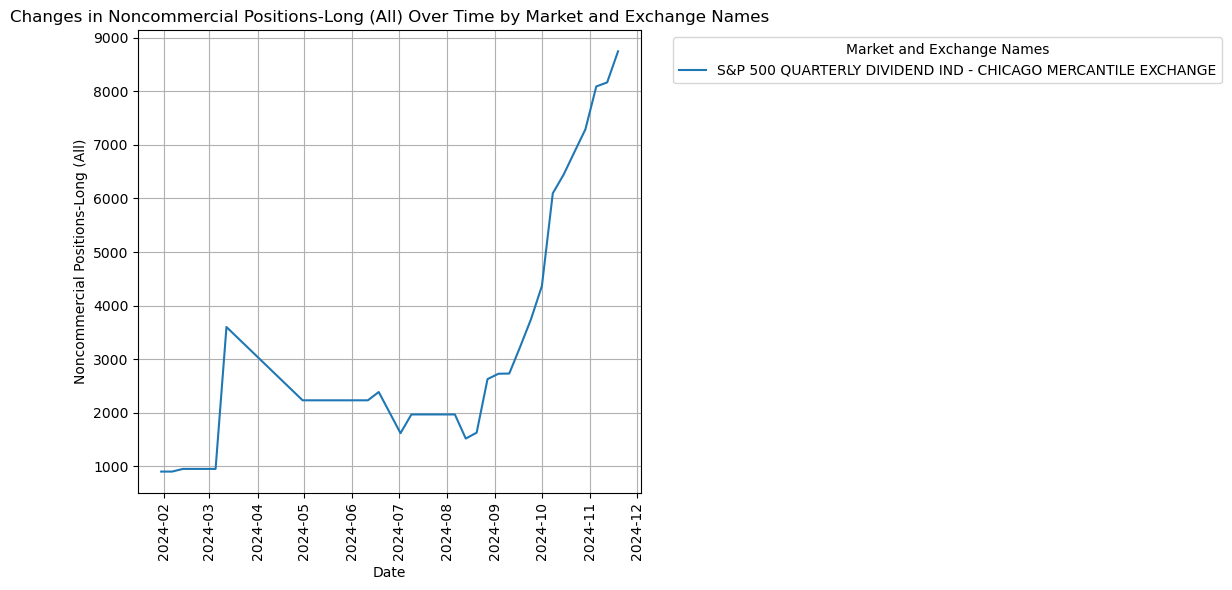

In [ ]:
plot_market_changes(df[df['Market and Exchange Names']=='S&P 500 QUARTERLY DIVIDEND IND - CHICAGO MERCANTILE EXCHANGE'], 'Noncommercial Positions-Long (All)')


In [13]:
col_dict={
    'Noncommercial':['Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)'],
    'Commercial':['Commercial Positions-Long (All)','Commercial Positions-Short (All)'],
    'Total Reportable':[' Total Reportable Positions-Long (All)','Total Reportable Positions-Short (All)'],
    'Nonreportable':['Nonreportable Positions-Long (All)','Nonreportable Positions-Short (All)']}

for a, b in col_dict.items():
    df[f'{a}_net_positions'] = df[b[0]] - df[b[1]]

In [16]:
df

,Market and Exchange Names,As of Date in Form YYYY-MM-DD,Open Interest (All),Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),Commercial Positions-Long (All),Commercial Positions-Short (All),Total Reportable Positions-Long (All),Total Reportable Positions-Short (All),Nonreportable Positions-Long (All),...,Change in Commercial-Long (All),Change in Commercial-Short (All),Change in Total Reportable-Long (All),Change in Total Reportable-Short (All),Change in Nonreportable-Long (All),Change in Nonreportable-Short (All),Noncommercial_net_positions,Commercial_net_positions,Total Reportable_net_positions,Nonreportable_net_positions
0,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-11-19,448073,116397,162436,173884,120161,417251,409567,30822,...,-2451,-9065,2099,2995,-973,-1869,-46039,53723,7684,-7684
1,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-11-12,446947,105967,144496,176335,129226,415152,406572,31795,...,7459,-9536,3433,2426,226,1233,-38529,47109,8580,-8580
2,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-11-05,443288,104711,127252,168876,138762,411719,404146,31569,...,7280,8766,25951,27087,1449,313,-22541,30114,7573,-7573
3,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-10-29,415888,106934,129825,161596,129996,385768,377059,30120,...,6678,-2459,5382,2054,-297,3031,-22891,31600,8709,-8709
4,WHEAT-SRW - CHICAGO BOARD OF TRADE,2024-10-22,410803,111145,128227,154918,132455,380386,375005,30417,...,8709,4679,11917,11255,342,1004,-17082,22463,5381,-5381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-30,17180,50,6024,16455,10451,17180,17150,0,...,-790,165,-490,-485,-10,-15,-5974,6004,30,-30
14774,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-23,17680,50,6974,17245,10286,17670,17635,10,...,1965,1041,1915,1940,10,-15,-6924,6959,35,-35
14775,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-16,15755,50,6025,15280,9245,15755,15695,0,...,1555,1105,1650,1710,-60,-120,-5975,6035,60,-60
14776,GULF # 6 FUEL OIL CRACK - NEW YORK MERCANTILE ...,2024-01-09,14165,50,5515,13725,8140,14105,13985,60,...,-1708,-803,-1983,-2043,0,60,-5465,5585,120,-120


In [17]:
import dash
from dash import dcc, html  # Import dcc and html
import dash.dependencies as dd
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    # Dropdown for selecting market
    html.Label("Select Market:"),
    dcc.Dropdown(
        id='market-dropdown',
        options=[{'label': market, 'value': market} for market in df['Market and Exchange Names'].unique()],
        value=df['Market and Exchange Names'].unique()[0],  # Default value
    ),
    
    # Date range picker
    html.Label("Select Date Range:"),
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df['As of Date in Form YYYY-MM-DD'].min().date(),
        end_date=df['As of Date in Form YYYY-MM-DD'].max().date(),
        display_format='YYYY-MM-DD',  # Format for the date picker
    ),
    
    # Dropdown for selecting columns (allow multiple selection)
    html.Label("Select Columns (Hold CTRL to select multiple):"),
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in df.columns if col != "Market and Exchange Names" and col != "As of Date in Form YYYY-MM-DD"],
        value=['Open Interest (All)'],  # Default value (single column)
        multi=True,  # Enable multi-selection
    ),
    
    # Graph for the line chart
    dcc.Graph(id='line-chart'),
])

# Callback to update the line chart based on user input
@app.callback(
    Output('line-chart', 'figure'),
    [Input('market-dropdown', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('column-dropdown', 'value')]
)
def update_chart(selected_market, start_date, end_date, selected_columns):
    # Filter data based on selected market
    filtered_df = df[df['Market and Exchange Names'] == selected_market]
    
    # Convert 'As of Date in Form YYYY-MM-DD' to datetime to ensure comparison works
    filtered_df['As of Date in Form YYYY-MM-DD'] = pd.to_datetime(filtered_df['As of Date in Form YYYY-MM-DD'])
    
    # Filter based on the selected date range
    filtered_df = filtered_df[
        (filtered_df['As of Date in Form YYYY-MM-DD'] >= pd.to_datetime(start_date)) &
        (filtered_df['As of Date in Form YYYY-MM-DD'] <= pd.to_datetime(end_date))
    ]
    
    # Create a line chart with Plotly
    fig = px.line(
        filtered_df, 
        x='As of Date in Form YYYY-MM-DD', 
        y=selected_columns, 
        title=f'{", ".join(selected_columns)} for {selected_market}', 
        labels={'As of Date in Form YYYY-MM-DD': 'Date'},
    )
    
    # Return the figure for the graph
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7528\1350294129.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_7528\1350294129.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_7528\1350294129.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d